## Comparing Regressors

In [1]:
! pip install lazypredict

     ---------------------------------------- 1.0/1.0 MB 2.0 MB/s eta 0:00:00


In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

### Load Dataset

In [7]:
df = pd.read_csv('P53_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [8]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

### Data pre-processing

In [9]:
X.shape

(1151, 881)

In [18]:
Y.shape

(1151,)

In [10]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(1151, 162)

In [11]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Compare ML algorithms

In [12]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:52<00:00,  1.25s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:50<00:00,  1.21s/it]


In [13]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.95,0.95,0.41,0.04
ExtraTreeRegressor,0.95,0.95,0.41,0.04
ExtraTreesRegressor,0.95,0.95,0.41,1.46
GaussianProcessRegressor,0.95,0.95,0.41,0.33
XGBRegressor,0.94,0.95,0.42,0.36
RandomForestRegressor,0.93,0.94,0.47,1.28
BaggingRegressor,0.92,0.94,0.49,0.18
HistGradientBoostingRegressor,0.91,0.92,0.54,8.24
MLPRegressor,0.90,0.92,0.55,2.68


In [14]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.51,0.85,0.77,0.46
HistGradientBoostingRegressor,0.50,0.85,0.78,7.75
NuSVR,0.49,0.85,0.79,0.11
SVR,0.48,0.85,0.79,0.12
RandomForestRegressor,0.47,0.84,0.81,1.07
GradientBoostingRegressor,0.46,0.84,0.81,0.51
BaggingRegressor,0.45,0.84,0.82,0.14
MLPRegressor,0.45,0.84,0.82,2.67
KNeighborsRegressor,0.43,0.83,0.83,0.03


### Data visualization of model performance

[(0.0, 1.0)]

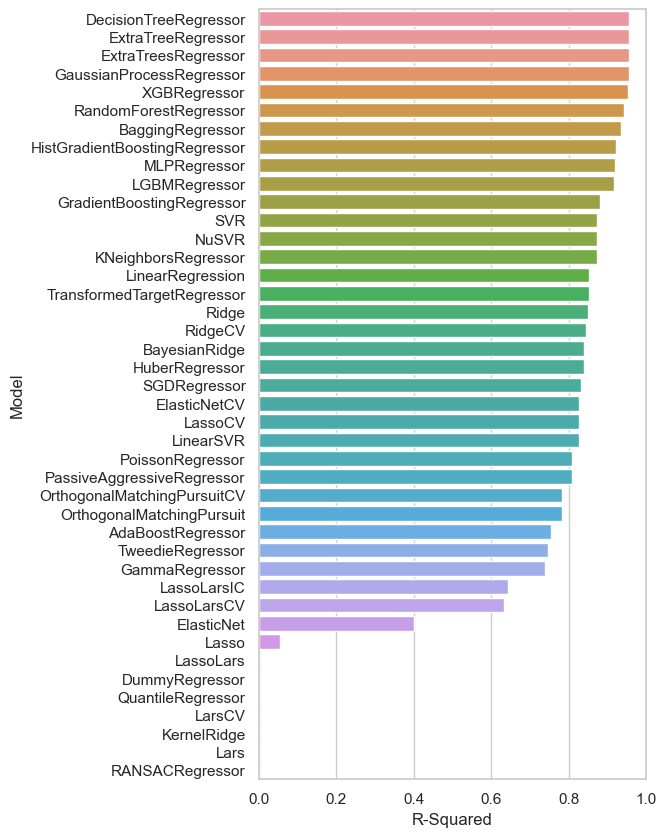

In [15]:
 # Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

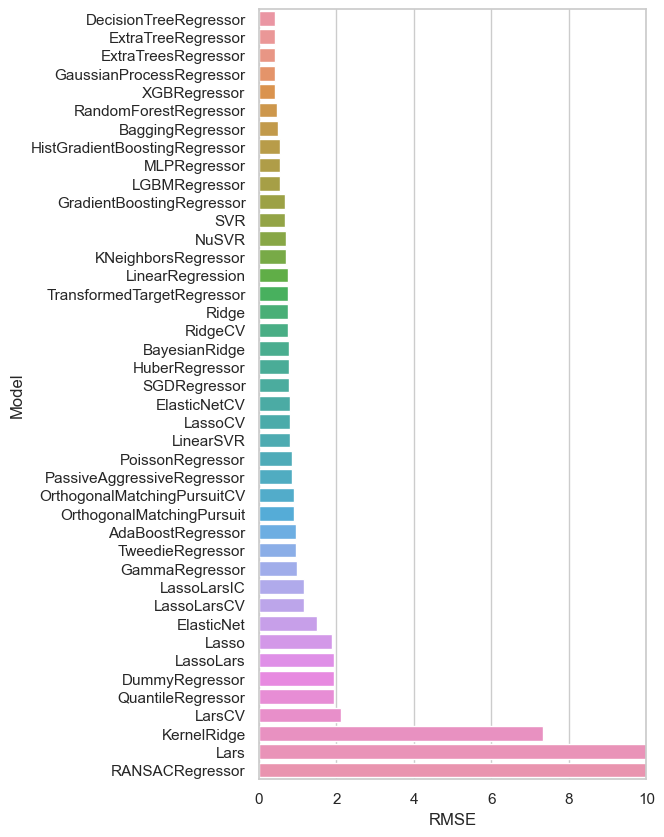

In [16]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

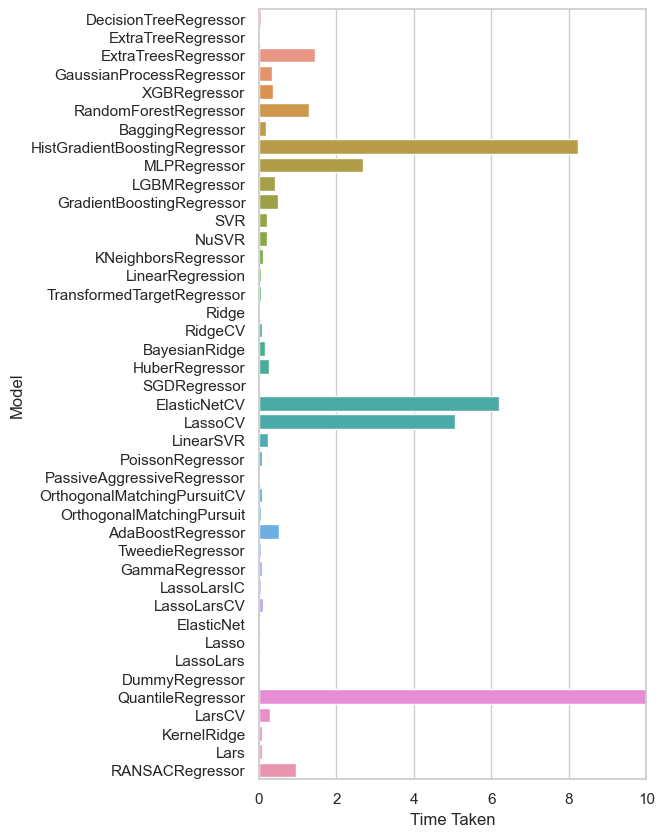

In [17]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))